# Model systems
ProcessOptimizer includes a system for easily benchmarking optimizations. You can build
model systems, which you can use in place of experimentation. Let's try to import a
simple model system, draw a few numbers from it, and plot the results:

21.633729733657468
21.60683570993757
21.64264441597851
21.646446686390206
21.588614688289304
21.601591801925135
21.630192200125727
21.621310540215507
21.627299368912293
21.610574513510908


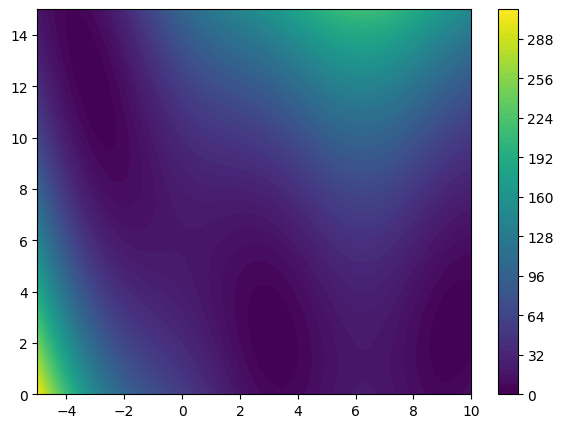

In [1]:
from ProcessOptimizer.model_systems import branin_hoo
import numpy as np
import matplotlib.pyplot as plt

for _ in range(10):
    print(branin_hoo.get_score([1, 2]))

# Extracting dimension min and max from the space
x_bounds = branin_hoo.space.dimensions[0].bounds
y_bounds = branin_hoo.space.dimensions[1].bounds

# Creating a grid of points
xx, yy = np.meshgrid(np.linspace(x_bounds[0], x_bounds[1], 100), np.linspace(y_bounds[0], y_bounds[1], 100))

# Calculating the score at each point
zz = np.array([branin_hoo.get_score([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]).reshape(xx.shape)

# Plotting the score
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, zz, 100)
plt.colorbar()
plt.show()

## Inspecting and changing noise size

The noise is very low - The noise is in fact not even visible on the plot. Let's find
out what the noise size is, increase it a bit, and plot the output of the new noise.

0.02


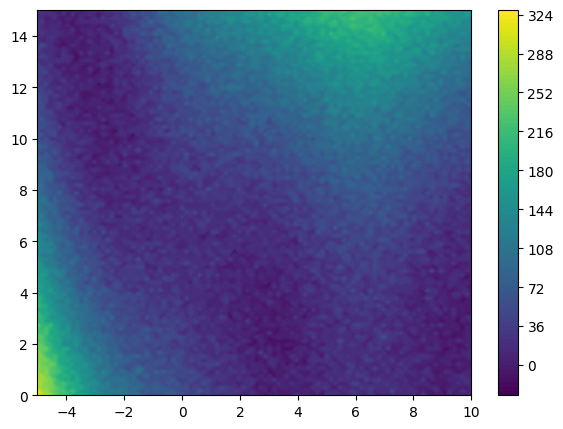

In [2]:
print(branin_hoo.noise_size)
branin_hoo.noise_size = 10

# Calculating the score at each point with the new noise size
zz = np.array([branin_hoo.get_score([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]).reshape(xx.shape)

# Plotting the score with the new noise size
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, zz, 100)
plt.colorbar()
plt.show()

## Changing the noise type

We can also change the type of noise. At the moment, the noise is constant. Let's try
and change it to noise the is proportional to the signal.

Now, we will have high noise in the areas with high singal, and low noise in the areas
with low signal.

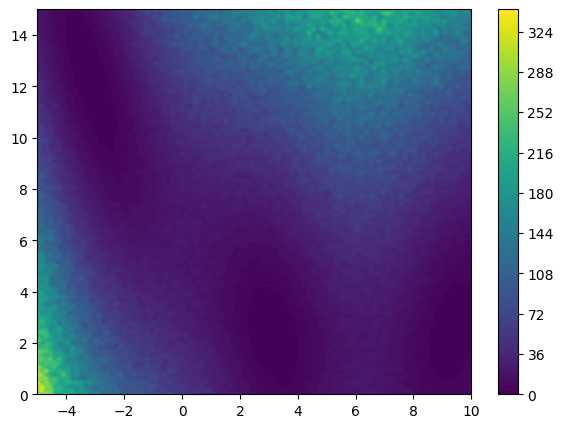

In [3]:
branin_hoo.set_noise_model("proportional")

# Calculating the score at each point with the new noise model
zz = np.array([branin_hoo.get_score([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]).reshape(xx.shape)

# Plotting the score with the new noise model
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, zz, 100)
plt.colorbar()
plt.show()

## More complicated noise models

We can make the noise model even more complex. Let's built a noise model that has zero
noise if `x+y<4` (lower left corner of plot), and otherwise have constant high noise if
`x-y>-4` (right side of plot), and moderate signal proportional noise otherwise (top of
plot).

Note that the noise models are initialised before they are used. Otherwise, we will get
a new noise model each time we call `get_score()`, and since they are seeded with a reproducible seed, they
will always give the same noise.

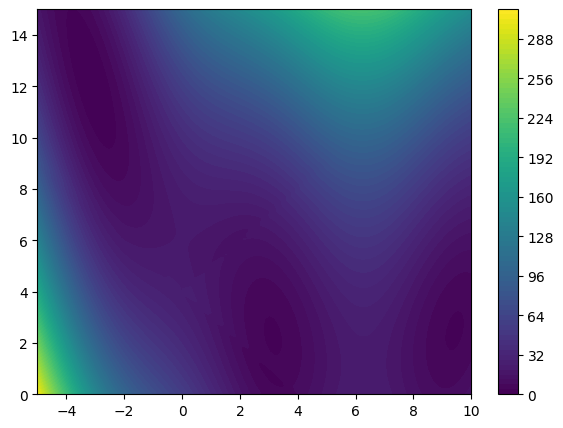

In [18]:
from ProcessOptimizer.model_systems import DataDependentNoise, parse_noise_model

zero_noise_model = parse_noise_model("zero")
constant_noise_model = parse_noise_model("constant", noise_size=10)
proportional_noise_model = parse_noise_model("proportional", noise_size=0.1)

# Making the complex noise function
def complex_noise_function(X):
    if X[0]+X[1]<4:
        return parse_noise_model("zero")
    elif X[0]-X[1]>-4:
        return parse_noise_model("constant", noise_size=10)
    else:
        return parse_noise_model("proportional", noise_size=0.1)

# Add the complex noise model to the model system
branin_hoo.set_noise_model(DataDependentNoise(noise_function=complex_noise_function))

# Calculating the score at each point with the new noise model
zz = np.array([branin_hoo.get_score([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]).reshape(xx.shape)

# Plotting the score with the new noise model
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, zz, 100)
plt.colorbar()
plt.show()